In [1]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [2]:
data_df = pd.read_csv('/Users/MacBookPro1/Desktop/DatafinitiElectronicsProductData.csv')

In [3]:
price_df = pd.read_json('https://raw.githubusercontent.com/BestBuyAPIs/open-data-set/master/products.json')

In [4]:
data_df.shape

(7299, 27)

In [5]:
data_df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'dateAdded',
       'dateUpdated', 'dimension', 'ean', 'imageURLs', 'keys', 'manufacturer',
       'manufacturerNumber', 'name', 'primaryCategories', 'reviews.date',
       'reviews.dateSeen', 'reviews.doRecommend', 'reviews.numHelpful',
       'reviews.rating', 'reviews.sourceURLs', 'reviews.text', 'reviews.title',
       'reviews.username', 'sourceURLs', 'upc', 'weight'],
      dtype='object')

In [6]:
data_df = data_df.drop(columns=['id', 'asins','colors','dateAdded','dateUpdated','dimension', 'ean', 'imageURLs', 'keys','manufacturerNumber','reviews.date','reviews.sourceURLs','reviews.username', 'sourceURLs', 'upc', 'weight'])

In [7]:
data_df.columns

Index(['brand', 'categories', 'manufacturer', 'name', 'primaryCategories',
       'reviews.dateSeen', 'reviews.doRecommend', 'reviews.numHelpful',
       'reviews.rating', 'reviews.text', 'reviews.title'],
      dtype='object')

In [8]:
data_df.head(5)

,brand,categories,manufacturer,name,primaryCategories,reviews.dateSeen,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.text,reviews.title
0,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Microsoft,Microsoft Surface Pro 4 Type Cover with Finger...,Electronics,"2017-09-03T00:00:00Z,2017-08-27T00:00:00Z,2017...",True,0.0,5.0,"This keyboard is very easy to type on, but the...",Love the fingerprint reader
1,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Microsoft,Microsoft Surface Pro 4 Type Cover with Finger...,Electronics,"2017-09-03T00:00:00Z,2017-08-27T00:00:00Z,2017...",True,0.0,4.0,It's thin and light. I can type pretty easily ...,Nice
2,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Microsoft,Microsoft Surface Pro 4 Type Cover with Finger...,Electronics,"2017-09-03T00:00:00Z,2017-08-27T00:00:00Z,2017...",True,0.0,4.0,I love the new design the keys are spaced well...,New
3,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Microsoft,Microsoft Surface Pro 4 Type Cover with Finger...,Electronics,"2017-09-03T00:00:00Z,2017-08-27T00:00:00Z,2017...",True,0.0,5.0,Attached easily and firmly. Has a nice feel. A...,Nice keyboard
4,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Microsoft,Microsoft Surface Pro 4 Type Cover with Finger...,Electronics,"2017-09-03T00:00:00Z,2017-08-27T00:00:00Z,2017...",True,0.0,5.0,"Our original keyboard was okay, but did not ha...",Nice improvement


In [9]:
mask = data_df['reviews.rating'] == 5.0
brand_df = data_df.loc[mask]
brand_df

,brand,categories,manufacturer,name,primaryCategories,reviews.dateSeen,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.text,reviews.title
0,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Microsoft,Microsoft Surface Pro 4 Type Cover with Finger...,Electronics,"2017-09-03T00:00:00Z,2017-08-27T00:00:00Z,2017...",True,0.0,5.0,"This keyboard is very easy to type on, but the...",Love the fingerprint reader
3,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Microsoft,Microsoft Surface Pro 4 Type Cover with Finger...,Electronics,"2017-09-03T00:00:00Z,2017-08-27T00:00:00Z,2017...",True,0.0,5.0,Attached easily and firmly. Has a nice feel. A...,Nice keyboard
4,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Microsoft,Microsoft Surface Pro 4 Type Cover with Finger...,Electronics,"2017-09-03T00:00:00Z,2017-08-27T00:00:00Z,2017...",True,0.0,5.0,"Our original keyboard was okay, but did not ha...",Nice improvement
5,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Microsoft,Microsoft Surface Pro 4 Type Cover with Finger...,Electronics,"2017-09-03T00:00:00Z,2017-08-27T00:00:00Z,2017...",True,0.0,5.0,purchased to replace original surface pro 3 ke...,big improvement
9,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Microsoft,Microsoft Surface Pro 4 Type Cover with Finger...,Electronics,"2017-09-03T00:00:00Z,2017-08-27T00:00:00Z,2017...",True,0.0,5.0,I can now quickly and hassle free log into my ...,Fingerprint Scanner is worth the money
10,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Microsoft,Microsoft Surface Pro 4 Type Cover with Finger...,Electronics,"2017-09-03T00:00:00Z,2017-08-27T00:00:00Z,2017...",True,0.0,5.0,A must have accessory for the surface pro comp...,Must have
15,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Microsoft,Microsoft Surface Pro 4 Type Cover with Finger...,Electronics,"2017-09-03T00:00:00Z,2017-08-27T00:00:00Z,2017...",True,0.0,5.0,Best keyboard. A must when using a tablet and ...,a must
16,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Microsoft,Microsoft Surface Pro 4 Type Cover with Finger...,Electronics,"2017-09-03T00:00:00Z,2017-08-27T00:00:00Z,2017...",True,2.0,5.0,"Keyboard works perfectly, no complaints. Nice ...",Great Keyboard!
17,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Microsoft,Microsoft Surface Pro 4 Type Cover with Finger...,Electronics,"2017-09-03T00:00:00Z,2017-08-27T00:00:00Z,2017...",True,2.0,5.0,Coming from mechanical switch keyboards and Th...,Best type cover keyboard on the market
19,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Microsoft,Microsoft Surface Pro 4 Type Cover with Finger...,Electronics,"2017-09-03T00:00:00Z,2017-08-27T00:00:00Z,2017...",True,4.0,5.0,I did not get the Surface Pro 4 because my Sur...,This is a start to a perfect keyboard experience


In [10]:
data_duplrem = data_df.drop_duplicates('brand')
## data_duplrem['brand']

In [11]:
price_df.shape

(51646, 12)

In [12]:
price_df.columns

Index(['category', 'description', 'image', 'manufacturer', 'model', 'name',
       'price', 'shipping', 'sku', 'type', 'upc', 'url'],
      dtype='object')

In [13]:
price_df = price_df.drop(columns=['image','url','upc','sku','category'])

In [14]:
price_df.head(5)

,description,manufacturer,model,name,price,shipping,type
0,Compatible with select electronic devices; AAA...,Duracell,MN2400B4Z,Duracell - AAA Batteries (4-Pack),5.49,5.49,HardGood
1,Long-lasting energy; DURALOCK Power Preserve t...,Duracell,MN1500B4Z,Duracell - AA 1.5V CopperTop Batteries (4-Pack),5.49,5.49,HardGood
2,Compatible with select electronic devices; AA ...,Duracell,MN1500B8Z,Duracell - AA Batteries (8-Pack),7.49,5.49,HardGood
3,4-pack AA alkaline batteries; battery tester i...,Energizer,E91BP-4,Energizer - MAX Batteries AA (4-Pack),4.99,5.49,HardGood
4,Compatible with select electronic devices; C s...,Duracell,MN1400R4Z,Duracell - C Batteries (4-Pack),8.99,5.49,HardGood


In [15]:
price_df = price_df.rename(columns={'manufacturer': 'brand'})

In [16]:
price_df.columns

Index(['description', 'brand', 'model', 'name', 'price', 'shipping', 'type'], dtype='object')

In [17]:
price_duplrem = price_df.drop_duplicates('brand')
#price_duplrem = ('brand')

In [18]:

brands = ['Microsoft', 'iHome','JBL', 'Yamaha','Sony','Samsung', 'Logitech','Lenovo','Toshiba','Dell']
def get_brand_price_mean():
    average_price_brand=[0,0,0,0,0,0,0,0,0,0]
    for i in range(len(brands)):
        mask = price_df['brand'] == brands[i]
        brand_df = price_df.loc[mask].mean()
        average_price_brand[i]=brand_df
    return average_price_brand

print(get_brand_price_mean())

[price    196.404661
dtype: float64, price    41.954286
dtype: float64, price    158.163739
dtype: float64, price    469.744265
dtype: float64, price    471.256211
dtype: float64, price    831.13711
dtype: float64, price    80.367907
dtype: float64, price    510.032736
dtype: float64, price    346.865139
dtype: float64, price    521.521122
dtype: float64]


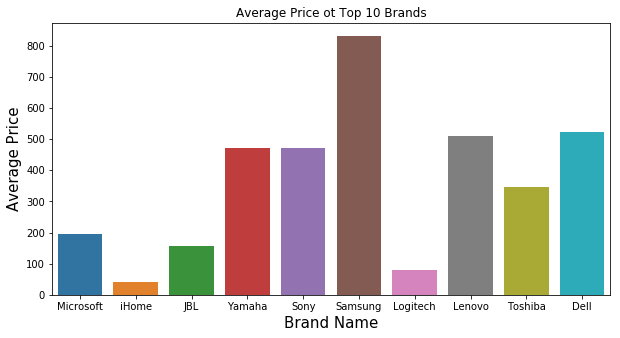

In [19]:
plt.figure(figsize=(10,5))
sns.barplot(brands,get_brand_price_mean())
plt.title('Average Price ot Top 10 Brands')
plt.ylabel('Average Price', fontsize=15)
plt.xlabel('Brand Name', fontsize=15)
plt.show()

In [20]:
# Removed all unncessary data. Left only the data that I will be working with it.
cleaned_data = price_df.loc[price_df['brand'].isin(['Microsoft', 'iHome','JBL', 'Yamaha','Sony','Samsung', 'Logitech','Lenovo','Toshiba','Dell'])]
cleaned_data

,description,brand,model,name,price,shipping,type
153,DELL 90W AC Power Adapter: Designed to power y...,Dell,3306258,Dell - 90W AC Power Adapter - Black,65.99,0,HardGood
158,Take down mutants and prove your mettle in a p...,Microsoft,PREOWNED,Sunset Overdrive - PRE-OWNED - Xbox One,19.99,3.99,Game
248,Complete dangerous missions in a dystopian wor...,Sony,PREOWNED,Freedom Wars - PRE-OWNED - PS Vita,4.99,3.99,Game
369,Uncover the mysterious and tragic story of a m...,Sony,None,White Knight Chronicles International Edition ...,9.99,3.99,Game
440,Compatible with most Alpha digital cameras; 7....,Sony,NPFW50,Sony - NP-FW50 High-Capacity Lithium-Ion Batte...,79.99,0,HardGood
569,Step into a world of shadows,Microsoft,None,Blue Dragon - PRE-OWNED - Xbox 360,9.99,3.99,Game
609,1.4GB - 80mm Mini - 10 Pack Spindle,Sony,10DMR30RS1H,Sony - DVD Recordable Media - DVD-R - 1.40 GB ...,17.49,5.49,HardGood
707,Compatible with select Apple iPhone and iPod m...,Yamaha,YID-W10BL,Yamaha - yAired Wireless System for Apple® iPh...,29.98,5.99,HardGood
760,"Analog oven controls; 5 burners; 600-18,000 BT...",Samsung,NX58F5700WS,"Samsung - 30"" Self-Cleaning Freestanding Gas C...",1699.99,,HardGood
791,Accommodates up to 15 place settings; 6 wash c...,Samsung,DW80F800UWS,"Samsung - 24"" Tall Tub Built-in Dishwasher wit...",799.99,,HardGood


In [21]:
# Moved the column from other dataframe to this one. 
cleaned_data['Reviews']=data_df['reviews.rating']

/Users/MacBookPro1/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [22]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2695 entries, 153 to 51636
Data columns (total 8 columns):
description    2695 non-null object
brand          2695 non-null object
model          2589 non-null object
name           2695 non-null object
price          2695 non-null float64
shipping       2695 non-null object
type           2695 non-null object
Reviews        253 non-null float64
dtypes: float64(2), object(6)
memory usage: 189.5+ KB


In [23]:
cleaned_data['Reviews'] = cleaned_data['Reviews'].apply(lambda v: random.randint(2,5))

/Users/MacBookPro1/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [24]:
# Data is cleaned and ready for modeling.
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2695 entries, 153 to 51636
Data columns (total 8 columns):
description    2695 non-null object
brand          2695 non-null object
model          2589 non-null object
name           2695 non-null object
price          2695 non-null float64
shipping       2695 non-null object
type           2695 non-null object
Reviews        2695 non-null int64
dtypes: float64(1), int64(1), object(6)
memory usage: 189.5+ KB


In [25]:
cleaned_data.head(5)

,description,brand,model,name,price,shipping,type,Reviews
153,DELL 90W AC Power Adapter: Designed to power y...,Dell,3306258,Dell - 90W AC Power Adapter - Black,65.99,0,HardGood,2
158,Take down mutants and prove your mettle in a p...,Microsoft,PREOWNED,Sunset Overdrive - PRE-OWNED - Xbox One,19.99,3.99,Game,5
248,Complete dangerous missions in a dystopian wor...,Sony,PREOWNED,Freedom Wars - PRE-OWNED - PS Vita,4.99,3.99,Game,5
369,Uncover the mysterious and tragic story of a m...,Sony,None,White Knight Chronicles International Edition ...,9.99,3.99,Game,4
440,Compatible with most Alpha digital cameras; 7....,Sony,NPFW50,Sony - NP-FW50 High-Capacity Lithium-Ion Batte...,79.99,0,HardGood,3


In [26]:
print(cleaned_data.Reviews.mean())

3.479777365491651


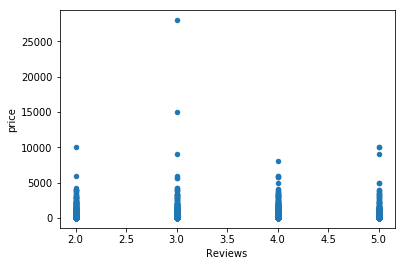

In [27]:
_ = cleaned_data.plot.scatter('Reviews','price')

# Modeling
   

In [28]:
beta, alpha = np.polyfit(cleaned_data.Reviews, cleaned_data.price,1)
print('beta: %0.3f, alpha: %0.1f.' % (beta, alpha))
print()

beta: -3.037, alpha: 532.3.



In [29]:
# Visualize the relationship.
# Plot the fitted line along with the scatter plot.

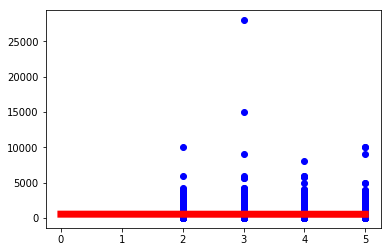

In [30]:
_ = plt.plot(cleaned_data.Reviews, cleaned_data.price, color='blue', marker='.', markersize=12, linestyle='none')
_ = plt.plot([0, 5], [alpha, alpha + beta * 5],  color='red', linewidth=7)
_ = plt.title('')

In [32]:
cleaned_data['predicted'] = cleaned_data['price'] * beta + alpha
cleaned_data['residual'] = cleaned_data['predicted'] - cleaned_data['price']

/Users/MacBookPro1/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/MacBookPro1/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


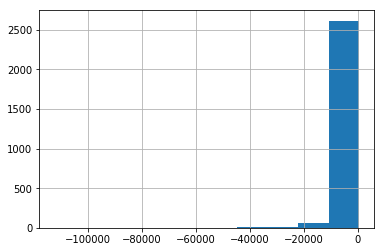

In [33]:
cleaned_data['residual'].hist(bins = 10)

In [34]:
# Add a constant to our existing dataframe for modeling purposes
cleaned_data = sm.add_constant(cleaned_data)

est = sm.OLS(cleaned_data['Reviews'],
            cleaned_data[['const', 'price']]
            ).fit()

print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                Reviews   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.02733
Date:                Sun, 09 Dec 2018   Prob (F-statistic):              0.869
Time:                        23:06:47   Log-Likelihood:                -4103.7
No. Observations:                2695   AIC:                             8211.
Df Residuals:                    2693   BIC:                             8223.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.4815      0.024    146.051      0.0